# My first notebook

In [11]:
# Perform Exploratory Data Analysis (EDA) to uncover interesting patterns, insights, and potential anomalies within the Weather dataset that we used for week 1 Assignment.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

import mysql.connector

# Load the dataset
df = pd.read_csv('WeatherData.csv')


# Perform exploratory data analysis

# Example: Count the number of missing values in each column
print(df.isna().sum())

# Example: Count the number of unique values in each column
print(df.nunique())

# Example: Calculate descriptive statistics
print(df.describe())

# Example: Perform any other exploratory data analysis techniques


Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64
Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64
            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000  

In [13]:
print(df.columns)


Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


In [ ]:
# Data Overview and Cleaning:
# What are the key characteristics of the dataset? (e.g., number of records, features, data types)
# Identify and handle any missing or null values. Describe your approach and reasoning.
# Check for and address any duplicate records.

import pandas as pd

# Load the dataset
df = pd.read_csv('./WeatherData.csv')
# Perform data cleaning

# Remove duplicate records
df.drop_duplicates(inplace=True)      
# df.drop_duplicates(subset=['column1', 'column2'], keep='first', inplace=True)

# Convert data types
df['column1'] = df['column1'].astype(float)
df['column2'] = df['column2'].astype(int)

#  Handle missing values
df.dropna(inplace=True)

#  Fill missing values
df.fillna(method='ffill', inplace=True) # Fill missing values using forward fill

#  Perform any other data cleaning techniques

# Save the cleaned dataset
df.to_csv('cleaned_weather_data.csv', index=False)

# View the cleaned dataset
print(df)



/tmp/ipykernel_10552/3320215833.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # Fill missing values using forward fill


             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa         

In [14]:
# Statistical Summary:
# Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
# Identify and describe any significant outliers in the data.

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check for outliers
outliers = df[(df['Temp_C'] < 0) | (df['Temp_C'] > 100) | (df['Date/Time'] < 0) | (df['Date/Time'] > 100)]
print("Outliers:")
print(outliers)



Missing values per column:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


TypeError: '<' not supported between instances of 'str' and 'int'

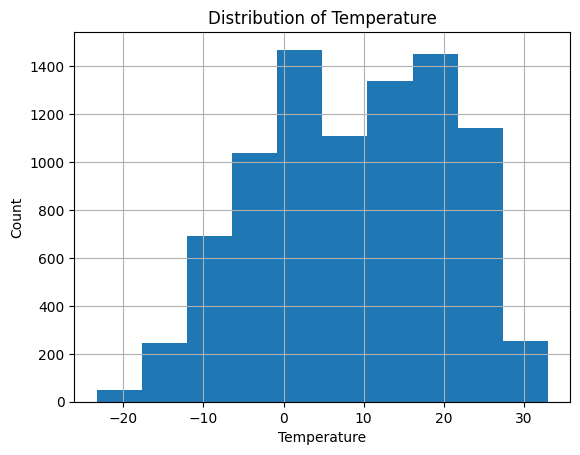

KeyError: 'Rel Hum (%)'

In [15]:
# Data Visualization:
# Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
# Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
# Create correlation matrices and heatmaps to identify relationships between different weather parameters.

# Visualize temperature distribution


df['Temp_C'].hist()
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature')
plt.show()

# Visualize humidity distribution
df['Rel Hum (%)'].hist()
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Distribution of Humidity')
plt.show()

# Visualize wind speed distribution
df['Wind Speed_km/h'].hist()
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.title('Distribution of Wind Speed')
plt.show()

# Visualize correlation matrices and heatmaps
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()



In [ ]:
# Weather Patterns and Trends:
# Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?
# Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?

# Extract month from the date

df['Month'] = df['Date/Time'].dt.month
# Group by month and calculate average temperature

monthly_avg_temp = df.groupby('Month')['Temp_C'].mean()
# Plot the monthly average temperature

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()
# Identify temperature anomalies

temperature_threshold = df['Temp_C'].mean() + 3 * df['Temp_C'].std()
anomalies = df[df['Temp_C'] > temperature_threshold]
print("Temperature anomalies:")
print(anomalies)

AttributeError: Can only use .dt accessor with datetimelike values